# Plotting companion properties

The [companion_data.json](https://github.com/tomasstolker/species/blob/main/species/data/companion_data/companion_data.json) file is part of the ``species`` package and contains properties of directly imaged planets and brown dwarfs, including magnitudes, parallaxes, and mass estimates.

The [list_companions](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.list_companions) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) can be used to print an overview of companions that are included. Companion data can be added to the ``Database`` by using the [add_companion](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_companion) method.

In this tutorial, we will read the data from the [JSON](https://nl.wikipedia.org/wiki/JSON) file directly and create a customized plot voor de mass ratios as function of orbital separation.

## Getting started

We start by importing the required Python modules:

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from species.core import constants
from species.data import companion_data

Next, we read the companion data from the JSON file:

In [2]:
json_file = companion_data.__path__[0]+'/companion_data.json'

with open(json_file, 'r') as open_file:
    comp_data = json.load(open_file)

## Extracting companion data

The data is stored in a dictionary of which the keys are the companion names:

In [3]:
print(comp_data.keys())

dict_keys(['AF Lep b', 'beta Pic b', 'beta Pic c', 'HIP 65426 b', 'HIP 99770 b', '51 Eri b', 'HR 8799 b', 'HR 8799 c', 'HR 8799 d', 'HR 8799 e', 'HD 95086 b', 'PDS 70 b', 'PDS 70 c', '2M 1207 B', 'AB Pic B', 'HD 206893 B', 'HD 206893 c', 'RZ Psc B', 'GQ Lup B', 'PZ Tel B', 'kappa And b', 'HD 1160 B', 'ROXs 12 B', 'ROXs 42 Bb', 'GJ 504 b', 'GJ 758 B', 'GU Psc b', '2M0103 ABb', '1RXS 1609 B', 'GSC 06214 B', 'HD 72946 B', 'HIP 64892 B', 'HD 13724 B', 'YSES 1 b', 'YSES 1 c', 'HD 142527 B', 'CS Cha B', 'CT Cha B', 'SR 12 C', 'DH Tau B', 'HD 4747 B', 'HR 3549 B', 'CHXR 73 B', 'HD 19467 B', 'b Cen (AB)b', 'eps Ind Ab', 'VHS 1256 B'])


We can select the data of a specific companion by providing the key to the dictionary. This returns a dictionary with the available companion data:

In [4]:
comp_dict = comp_data['HR 8799 b']
print(comp_dict)

{'simbad': 'HR 8799', 'gaia_dr3': 2832463659640297472, 'parallax': [24.462, 0.0455], 'app_mag': {'Subaru/CIAO.z': [21.22, 0.29], 'Paranal/SPHERE.IRDIS_B_J': [19.78, 0.09], 'Keck/NIRC2.H': [18.05, 0.09], 'Paranal/SPHERE.IRDIS_D_H23_2': [18.08, 0.14], 'Paranal/SPHERE.IRDIS_D_H23_3': [17.78, 0.1], 'Keck/NIRC2.Ks': [17.03, 0.08], 'Paranal/SPHERE.IRDIS_D_K12_1': [17.15, 0.06], 'Paranal/SPHERE.IRDIS_D_K12_2': [16.97, 0.09], 'Paranal/NACO.Lp': [15.52, 0.1], 'Paranal/NACO.NB405': [14.82, 0.18], 'Keck/NIRC2.Ms': [16.05, 0.3], 'JWST/NIRCAM.F182M': [18.66, 0.11], 'JWST/NIRCAM.F200W': [17.76, 0.06], 'JWST/NIRCAM.F210M': [17.39, 0.05], 'JWST/NIRCAM.F250M': [18.19, 0.17], 'JWST/NIRCAM.F300M': [17.37, 0.04], 'JWST/NIRCAM.F335M': [16.2, 0.05], 'JWST/NIRCAM.F410M': [15.25, 0.04], 'JWST/NIRCAM.F430M': [16.04, 0.1], 'JWST/NIRCAM.F460M': [16.01, 0.13]}, 'semi_major': [71.3, -0.2, 0.2], 'mass_star': [1.52, 0.15], 'mass_companion': [5.8, 0.5], 'accretion': False, 'age': [42.0, -16.0, 14.0], 'references': ['

## Plotting mass ratio versus separation

Now we will plot the companion-to-star mass ratios versus the orbital separation. We start by creating a dictionary with the positions of the labels that will be placed next to the markers.

In [5]:
label_pos = {}
for item in comp_data:
    label_pos[item] = 'bottom'

label_pos['RZ Psc B'] = 'left'
label_pos['AB Pic B'] = 'left'
label_pos['HD 142527 B'] = 'top'
label_pos['beta Pic b'] = 'left'
label_pos['HIP 65426 b'] = 'right'
label_pos['PDS 70 c'] = 'top'
label_pos['51 Eri b'] = 'top'
label_pos['HR 8799 b'] = 'right'
label_pos['HR 8799 d'] = 'top'
label_pos['HR 8799 e'] = 'right'
label_pos['kappa And b'] = 'top'
label_pos['GJ 504 b'] = 'left'
label_pos['GQ Lup B'] = 'top'
label_pos['HD 206893 B'] = 'top'
label_pos['2M0103 ABb'] = 'right'
label_pos['1RXS 1609 B'] = 'top'
label_pos['TYC 8988 B'] = 'left'
label_pos['HD 72946 B'] = 'top'
label_pos['HIP 64892 B'] = 'right'
label_pos['PZ Tel B'] = 'top'
label_pos['ROXs 12 B'] = 'top'
label_pos['CT Cha B'] = 'top'
label_pos['DH Tau B'] = 'top2'
label_pos['CHXR 73 B'] = 'top'
label_pos['HD 1160 B'] = 'left'
label_pos['HR 3549 B'] = 'left'
label_pos['ROXs 42 Bb'] = 'left'
label_pos['b Cen (AB)b'] = 'left2'
label_pos['HD 13724 B'] = 'left'

Now we will create the actual plot for which we will use the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function of [Matplotlib](https://matplotlib.org). We will use the marker size as indication for the stellar mass. We will also highlight accreting companions with a different marker.

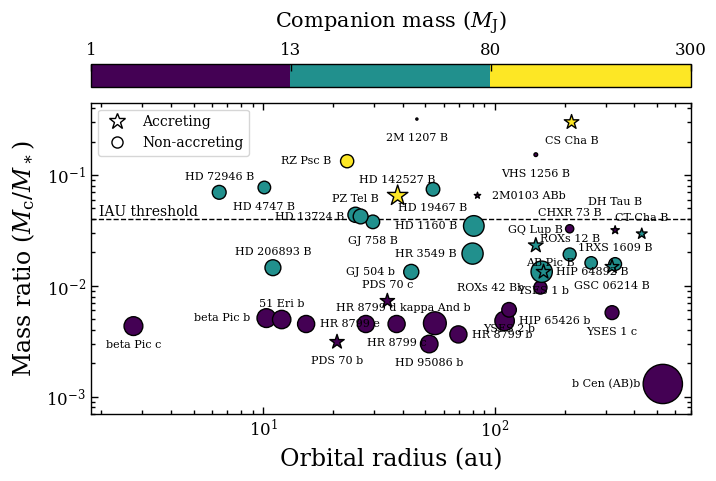

In [6]:
fig = plt.figure(3, figsize=(6, 3.5))
gs = mpl.gridspec.GridSpec(3, 1, height_ratios=[0.3, 0.2, 4])
gs.update(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

ax1 = plt.subplot(gs[2, 0])
ax2 = plt.subplot(gs[0, 0])

ax1.tick_params(axis='both', which='major', colors='black', labelcolor='black', direction='in', width=1, length=5, labelsize=12, top=True, bottom=True, left=True, right=True)
ax1.tick_params(axis='both', which='minor', colors='black', labelcolor='black', direction='in', width=1, length=3, labelsize=12, top=True, bottom=True, left=True, right=True)

ax2.tick_params(axis='both', which='major', colors='black', labelcolor='black', direction='in', width=1, length=5, labelsize=12, top=True, bottom=True, left=True, right=True)
ax2.tick_params(axis='both', which='minor', colors='black', labelcolor='black', direction='in', width=1, length=3, labelsize=12, top=True, bottom=True, left=True, right=True)

ax1.set_xlabel('Orbital radius (au)', fontsize=17)
ax1.set_ylabel('Mass ratio ($M_\mathrm{c}$/$M_\\ast$)', fontsize=17)

ax1.set_xlim(1.8, 700.)
ax1.set_ylim(0.0007, 0.45)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.get_xaxis().set_label_coords(0.5, -0.11)
ax1.get_yaxis().set_label_coords(-0.09, 0.5)

bounds = [1., 13.01, 80.01, 300.]
ticks = [1., 13.01, 80.01, 300.]
ticklabels = ['1', '13', '80', '300']

cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

semi_major = []
mass_ratio = []
star_mass = []
comp_mass = []
comp_name = []
accretion = []

for key, value in comp_data.items():
    if 'semi_major' in value:
        semi_major.append(value['semi_major'][0])
        mass_ratio.append((value['mass_companion'][0]*constants.M_JUP) / (value['mass_star'][0]*constants.M_SUN))
        star_mass.append(value['mass_star'][0])
        comp_mass.append(value['mass_companion'][0])
        comp_name.append(key)
        accretion.append(value['accretion'])
        
semi_major = np.array(semi_major)
mass_ratio = np.array(mass_ratio)
star_mass = np.array(star_mass)
comp_mass = np.array(comp_mass)
comp_name = np.array(comp_name)
accretion = np.array(accretion)

ax1.text(1.95, 1./25., 'IAU threshold', va='bottom', ha='left', fontsize=10.)
ax1.axhline(1./25., color='black', ls='--', lw=1., zorder=0.)

scat = ax1.scatter(semi_major[~accretion], mass_ratio[~accretion], s=100.*star_mass[~accretion], c=comp_mass[~accretion], marker='o', norm=norm, edgecolor='black', lw=1.)
ax1.scatter(semi_major[accretion], mass_ratio[accretion], s=120.*star_mass[accretion], c=comp_mass[accretion], marker='*', norm=norm, edgecolor='black', lw=1.)

for i, item in enumerate(comp_name):
    if label_pos[item] == 'top':
        ax1.annotate(item, (semi_major[i], mass_ratio[i]+0.25*mass_ratio[i]), va='bottom', ha='center', fontsize=8.)

    elif label_pos[item] == 'bottom':
        ax1.annotate(item, (semi_major[i], mass_ratio[i]-0.25*mass_ratio[i]), va='top', ha='center', fontsize=8.)

    elif label_pos[item] == 'left':
        ax1.annotate(item, (semi_major[i]-0.15*semi_major[i], mass_ratio[i]), va='center', ha='right', fontsize=8.)

    elif label_pos[item] == 'left2':
        ax1.annotate(item, (semi_major[i]-0.2*semi_major[i], mass_ratio[i]), va='center', ha='right', fontsize=8.)

    elif label_pos[item] == 'right':
        ax1.annotate(item, (semi_major[i]+0.15*semi_major[i], mass_ratio[i]), va='center', ha='left', fontsize=8.)

    elif label_pos[item] == 'top2':
        ax1.annotate(item, (semi_major[i], 2.*mass_ratio[i]), va='top', ha='center', fontsize=8.)

cb = mpl.colorbar.Colorbar(ax=ax2, mappable=scat, orientation='horizontal', ticklocation='top', format='%.1f')
cb.ax.set_xlabel('Companion mass ($M_\mathrm{J}$)', rotation=0, labelpad=10, fontsize=15)
cb.solids.set_edgecolor('face')
cb.set_ticklabels(ticklabels)

ax1.plot([], [], '*', ms=12., mew=1., markerfacecolor='white', markeredgecolor='black', label='Accreting')
ax1.plot([], [], 'o', ms=8., mew=1., markerfacecolor='white', markeredgecolor='black', label='Non-accreting')
ax1.legend(loc='upper left', frameon=True, fontsize=10.)

plt.show()